<a href="https://colab.research.google.com/github/SorrowAddict/SK-FLY-AI/blob/main/AI_Learning/Week-03_DACON_AI_Training/240102_RNN_%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(%EC%A0%95%EB%8F%84%EC%98%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# RNN 주가예측프로젝트
## 데이터 수집 - EDA - 전처리 - 모델링 - 성능 개선
### 1. FinanceDataReader로 주식 데이터 불러오기

종목 코드 얻기

In [ ]:
import pandas as pd
def make_code(x):
    x = str(x)
    return '0'*(6-len(x)) + x

code_data = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
code_data['종목코드'] = code_data['종목코드'].apply(make_code)
code_list = code_data[code_data['상장일'] < '2017-01-01']['종목코드']
code_data.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BGF리테일,282330,종합 소매업,체인화 편의점,2017-12-08,12월,민승배,http://www.bgfretail.com,서울특별시
2,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
3,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
4,DS단석,017860,기타 화학제품 제조업,바이오에너지,2023-12-22,12월,한승욱,http://dsdansuk.com,경기도


In [ ]:
# !pip install finance-datareader   #finance-datareader 설치

- 특정 종목 불러오기

In [ ]:
import FinanceDataReader as fdr
fdr.DataReader('000210', start = '2015', end = '2017')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,59186,59186,57469,58283,221293,-0.019762
2015-01-05,58012,58192,55481,56024,442867,-0.038759
2015-01-06,55030,55481,51777,52590,693187,-0.061295
2015-01-07,52048,53403,51957,52590,238313,0.000000
2015-01-08,52951,53765,52951,53042,158172,0.008595
...,...,...,...,...,...,...
2016-12-23,75090,75271,74186,74819,71871,-0.008389
2016-12-26,74819,75813,74638,75361,78665,0.007244
2016-12-27,75361,76084,74548,75633,67118,0.003609


### 2. FinanceDataReader 특징

In [ ]:
fdr.DataReader('000210', start = '2015' ).reset_index()

,Date,Open,High,Low,Close,Volume,Change
0,2015-01-02,59186,59186,57469,58283,221293,-0.019762
1,2015-01-05,58012,58192,55481,56024,442867,-0.038759
2,2015-01-06,55030,55481,51777,52590,693187,-0.061295
3,2015-01-07,52048,53403,51957,52590,238313,0.000000
4,2015-01-08,52951,53765,52951,53042,158172,0.008595
...,...,...,...,...,...,...,...
2210,2023-12-22,51700,52500,50900,52400,76211,0.011583
2211,2023-12-26,52600,52700,50600,51800,58145,-0.011450
2212,2023-12-27,51800,52000,50100,51100,70013,-0.013514
2213,2023-12-28,51000,51600,50400,51400,43825,0.005871


위 데이터 프레임을 설명하자면, '000210' DL이라는 회사의 15년부터 현재까지의 데이터입니다.

Date 주식시장 개장 날짜

Open은 해당 개장일의 시가

High는 해당 개장일의 고가

Low는 해당 개장일의 저가

Close는 해당 개장일의 종가

Volume은 해당 개장일의 거래량

Change는 해당 개장일의 전날 대비 종가 상승률 입니다. (음수면 하락 양수면 상승)



해당 라이브러리는 기간 보다는 fdr함수를 쓰는 것에 대해 시간이 많이 들었습니다.

즉, 한 종목에 대해 2년의 데이터를 불러오는 것과 1년의 데이터를 불러오는 것은 시간 차이가 없음.

2종목을 각각 1년기간의 데이터를 불러오는게 시간이 오래걸림.

fdr 함수의 호출 횟수가 시간 복잡도를 많이 잡아 먹습니다.

In [ ]:
import FinanceDataReader as fdr
df = fdr.DataReader('005930', start = '2015', end = '2023')
df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

Epoch 1/10
86/86 [==============================] - 5s 13ms/step - loss: 0.0063
Epoch 2/10
86/86 [==============================] - 1s 12ms/step - loss: 3.0191e-04
Epoch 3/10
86/86 [==============================] - 1s 11ms/step - loss: 2.8846e-04
Epoch 4/10
86/86 [==============================] - 1s 12ms/step - loss: 2.7834e-04
Epoch 5/10
86/86 [==============================] - 1s 12ms/step - loss: 2.8442e-04
Epoch 6/10
86/86 [==============================] - 1s 16ms/step - loss: 3.0050e-04
Epoch 7/10
86/86 [==============================] - 2s 19ms/step - loss: 3.0864e-04
Epoch 8/10
86/86 [==============================] - 1s 15ms/step - loss: 2.8568e-04
Epoch 9/10
86/86 [==============================] - 1s 11ms/step - loss: 2.8133e-04
Epoch 10/10
22/22 [==============================] - 1s 7ms/step


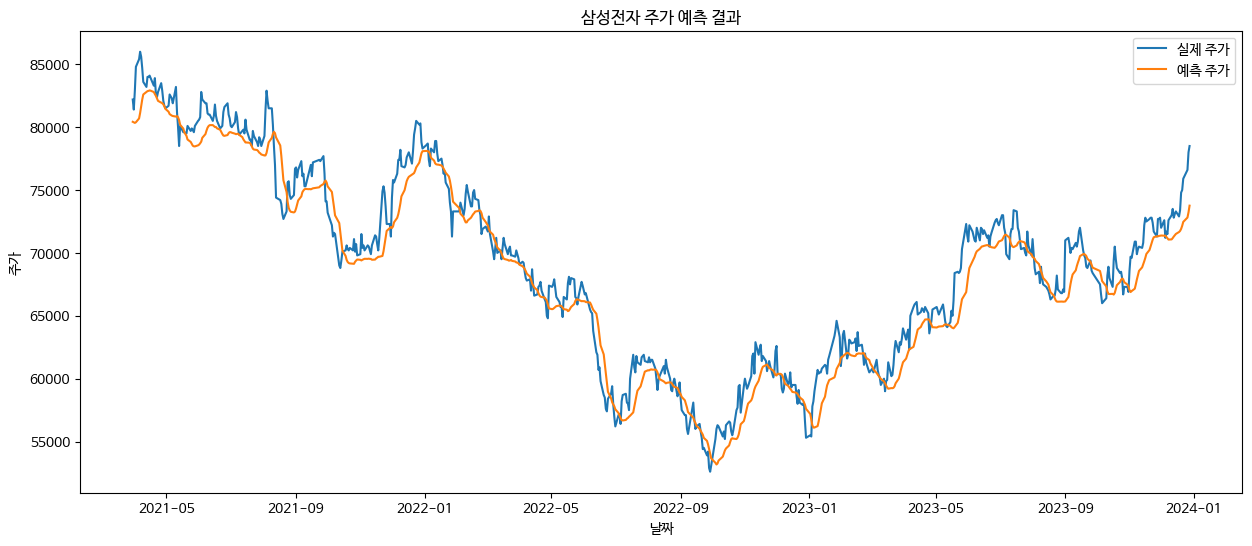

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import FinanceDataReader as fdr

# 삼성전자 주식 데이터 가져오기
stock_code = '005930'  # 삼성전자 종목코드
start_date = '2010-01-01'
end_date = '2023-12-31'
samsung_df = fdr.DataReader(stock_code, start_date, end_date)

# 'Close' 열 선택
data = samsung_df['Close'].values.reshape(-1, 1)

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# 시계열 데이터를 학습용과 테스트용으로 나눔
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train_data, test_data = data_normalized[0:train_size], data_normalized[train_size:len(data_normalized)]

# 시계열 데이터를 학습용 데이터셋으로 변환
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# LSTM에 입력될 형태로 변환
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 모델 예측
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# 예측 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(samsung_df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='실제 주가')
plt.plot(samsung_df.index[-len(y_test):], predicted_stock_price, label='예측 주가')
plt.title('삼성전자 주가 예측 결과')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()


Epoch 1/10
69/69 [==============================] - 7s 18ms/step - loss: 0.0224
Epoch 2/10
69/69 [==============================] - 1s 15ms/step - loss: 6.8344e-04
Epoch 3/10
69/69 [==============================] - 1s 16ms/step - loss: 6.1155e-04
Epoch 4/10
69/69 [==============================] - 1s 15ms/step - loss: 6.2101e-04
Epoch 5/10
69/69 [==============================] - 1s 15ms/step - loss: 6.0894e-04
Epoch 6/10
69/69 [==============================] - 1s 14ms/step - loss: 5.7738e-04
Epoch 7/10
69/69 [==============================] - 1s 13ms/step - loss: 5.8124e-04
Epoch 8/10
69/69 [==============================] - 1s 13ms/step - loss: 6.2925e-04
Epoch 9/10
69/69 [==============================] - 1s 13ms/step - loss: 5.5274e-04
Epoch 10/10
1/1 [==============================] - 0s 25ms/step


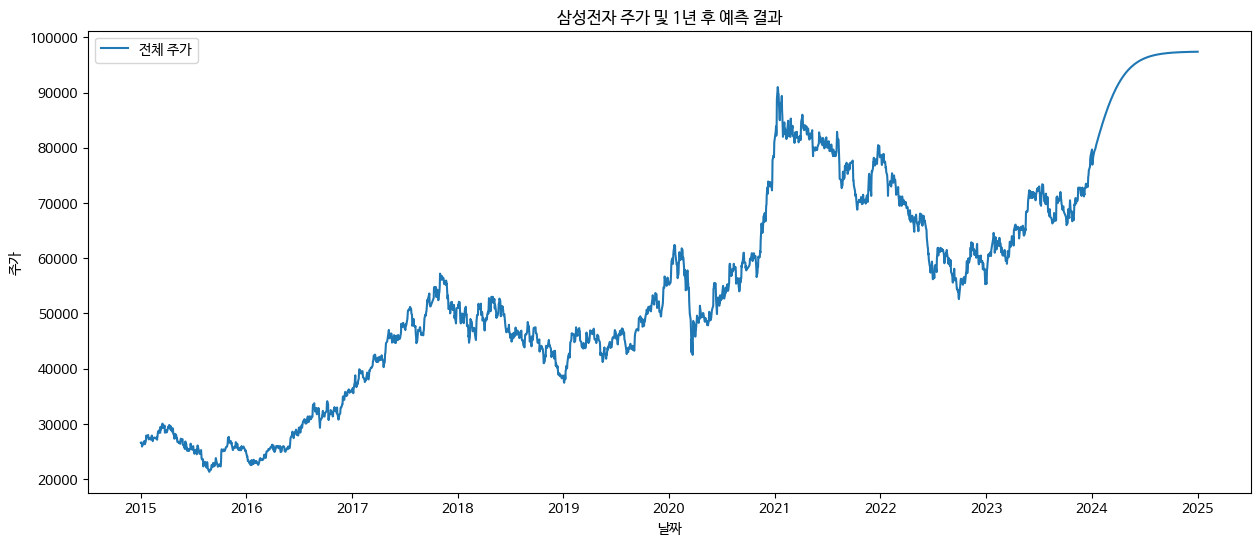

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import FinanceDataReader as fdr
from datetime import datetime, timedelta

# 삼성전자 주식 데이터 가져오기
stock_code = '005930'  # 삼성전자 종목코드
start_date = '2015-01-01'
end_date = datetime.today()
samsung_df = fdr.DataReader(stock_code, start_date, end_date)

# 'Close' 열 선택
data = samsung_df['Close'].values.reshape(-1, 1)

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# 시계열 데이터를 학습용으로 변환
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
X, y = create_dataset(data_normalized, time_steps)

# LSTM에 입력될 형태로 변환
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X, y, epochs=10, batch_size=32)

# 향후 1년간 데이터 예측
future_dates = [end_date + timedelta(days=i) for i in range(1, 366)]
future_data = np.copy(data_normalized[-time_steps:])

predicted_prices = []

for _ in range(365):
    input_data = future_data[-time_steps:]
    input_data = input_data.reshape((1, time_steps, 1))
    predicted_price = model.predict(input_data)[0][0]
    future_data = np.append(future_data, predicted_price)
    predicted_prices.append(predicted_price)

# 역정규화
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# 전체 데이터와 예측 데이터 합치기
all_dates = samsung_df.index.append(pd.to_datetime(future_dates))
all_data = np.concatenate((scaler.inverse_transform(data_normalized), predicted_prices), axis=0)

# 시각화
plt.figure(figsize=(15, 6))
plt.plot(all_dates, all_data, label='전체 주가')
plt.title('삼성전자 주가 및 1년 후 예측 결과')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()


Epoch 1/10
86/86 [==============================] - 6s 10ms/step - loss: 0.0060
Epoch 2/10
86/86 [==============================] - 1s 12ms/step - loss: 3.1817e-04
Epoch 3/10
86/86 [==============================] - 1s 11ms/step - loss: 3.1378e-04
Epoch 4/10
86/86 [==============================] - 1s 12ms/step - loss: 3.0428e-04
Epoch 5/10
86/86 [==============================] - 1s 13ms/step - loss: 3.1400e-04
Epoch 6/10
86/86 [==============================] - 1s 11ms/step - loss: 3.1384e-04
Epoch 7/10
86/86 [==============================] - 1s 11ms/step - loss: 2.9253e-04
Epoch 8/10
86/86 [==============================] - 1s 11ms/step - loss: 3.0791e-04
Epoch 9/10
86/86 [==============================] - 1s 11ms/step - loss: 3.0968e-04
Epoch 10/10
1/1 [==============================] - 0s 22ms/step


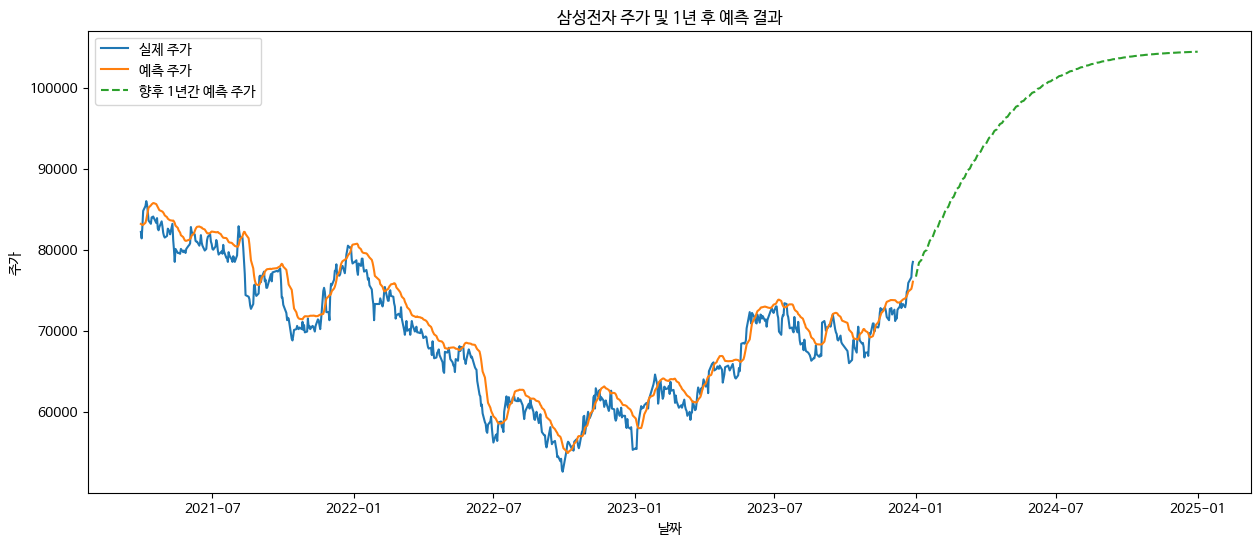

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import FinanceDataReader as fdr

# 삼성전자 주식 데이터 가져오기
stock_code = '005930'  # 삼성전자 종목코드
start_date = '2010-01-01'
end_date = '2023-12-31'
samsung_df = fdr.DataReader(stock_code, start_date, end_date)

# 'Close' 열 선택
data = samsung_df['Close'].values.reshape(-1, 1)

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# 시계열 데이터를 학습용과 테스트용으로 나눔
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train_data, test_data = data_normalized[0:train_size], data_normalized[train_size:len(data_normalized)]

# 시계열 데이터를 학습용 데이터셋으로 변환
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# LSTM에 입력될 형태로 변환
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 모델 예측
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# 향후 1년간 데이터 예측
future_dates = pd.date_range(start='2024-01-01', end='2025-01-01', freq='B')  # 2024-01-01부터 2025-01-01까지의 영업일 날짜 생성
future_data = np.copy(data_normalized[-time_steps:])

predicted_prices = []

for _ in range(len(future_dates)):
    input_data = future_data[-time_steps:]
    input_data = input_data.reshape((1, time_steps, 1))
    predicted_price = model.predict(input_data)[0][0]
    future_data = np.append(future_data, predicted_price)
    predicted_prices.append(predicted_price)

# 역정규화
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# 시각화
plt.figure(figsize=(15, 6))
plt.plot(samsung_df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='실제 주가')
plt.plot(samsung_df.index[-len(y_test):], predicted_stock_price, label='예측 주가')
plt.plot(future_dates, predicted_prices, label='향후 1년간 예측 주가', linestyle='dashed')
plt.title('삼성전자 주가 및 1년 후 예측 결과')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

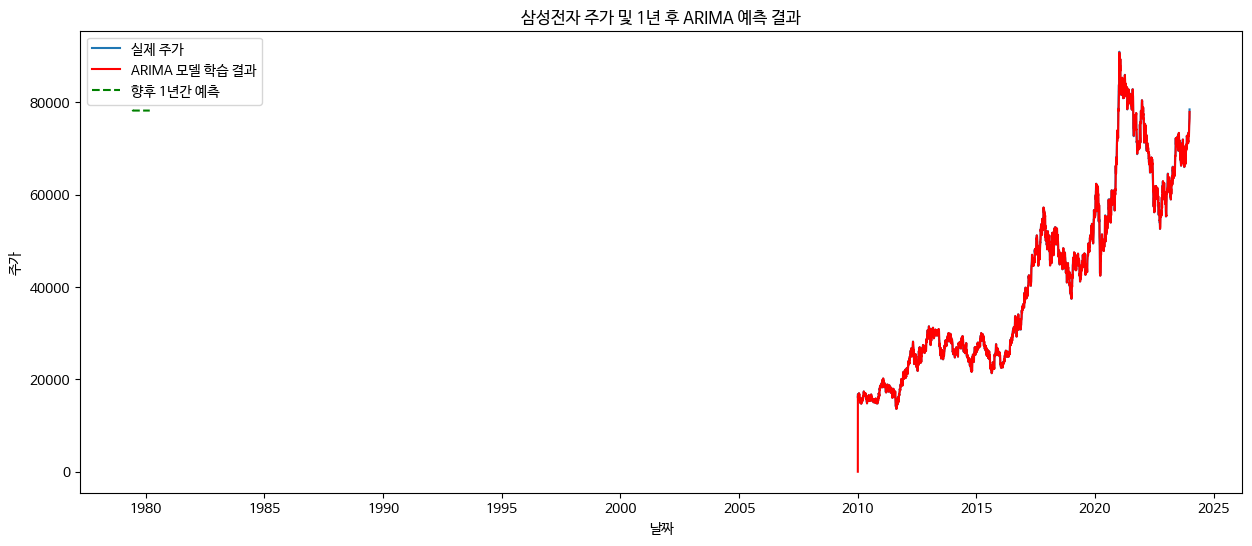

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import FinanceDataReader as fdr

# 삼성전자 주식 데이터 가져오기
stock_code = '005930'  # 삼성전자 종목코드
start_date = '2010-01-01'
end_date = '2023-12-31'
samsung_df = fdr.DataReader(stock_code, start_date, end_date)

# 'Close' 열 선택
data = samsung_df['Close']

# ARIMA 모델 학습 및 예측
order = (5, 1, 1)  # ARIMA(p, d, q)의 p, d, q 값 설정
model = ARIMA(data, order=order)
result = model.fit()

# 향후 1년간 데이터 예측
future_dates = pd.date_range(start='2024-01-01', end='2025-01-01', freq='B')  # 2024-01-01부터 2025-01-01까지의 영업일 날짜 생성
forecast = result.get_forecast(steps=len(future_dates))

# 예측 결과 시각화
plt.figure(figsize=(15, 6))
plt.plot(data.index, data, label='실제 주가')
plt.plot(result.fittedvalues.index, result.fittedvalues, color='red', label='ARIMA 모델 학습 결과')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, linestyle='dashed', color='green', label='향후 1년간 예측')
plt.title('삼성전자 주가 및 1년 후 ARIMA 예측 결과')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()


### SK하이닉스 주가 예측 실습

Epoch 1/10
86/86 [==============================] - 4s 10ms/step - loss: 0.0075
Epoch 2/10
86/86 [==============================] - 1s 10ms/step - loss: 4.2831e-04
Epoch 3/10
86/86 [==============================] - 1s 10ms/step - loss: 4.1580e-04
Epoch 4/10
86/86 [==============================] - 1s 10ms/step - loss: 4.1385e-04
Epoch 5/10
86/86 [==============================] - 1s 17ms/step - loss: 4.2422e-04
Epoch 6/10
86/86 [==============================] - 1s 16ms/step - loss: 3.8788e-04
Epoch 7/10
86/86 [==============================] - 2s 24ms/step - loss: 3.8114e-04
Epoch 8/10
86/86 [==============================] - 1s 16ms/step - loss: 4.0303e-04
Epoch 9/10
86/86 [==============================] - 1s 14ms/step - loss: 4.2553e-04
Epoch 10/10
1/1 [==============================] - 0s 27ms/step


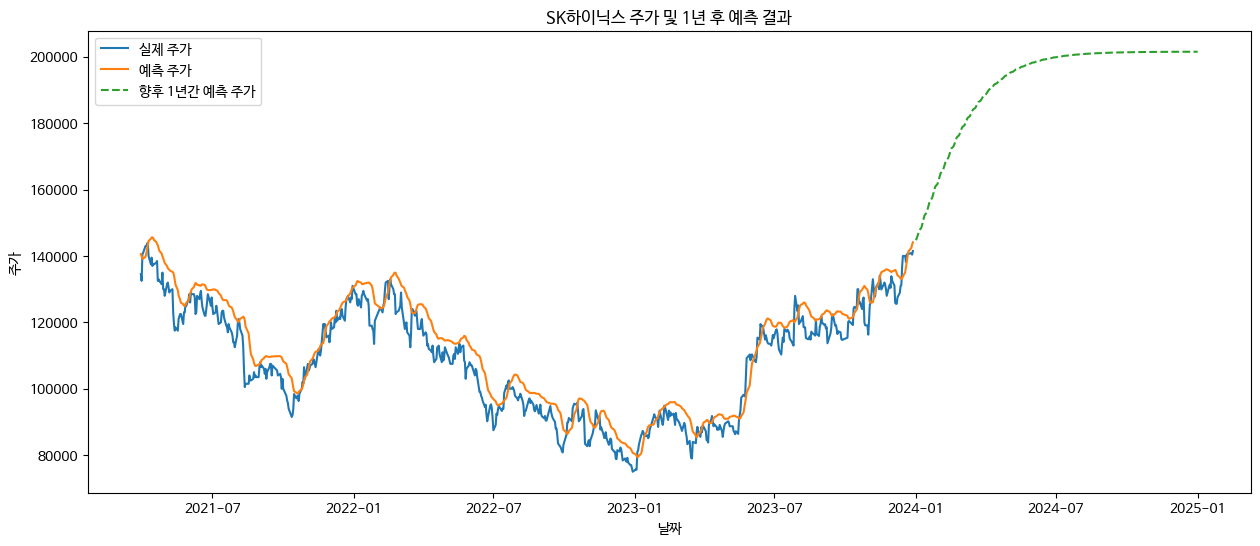

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import FinanceDataReader as fdr

# SK하이닉스 주식 데이터 가져오기
stock_code = '000660'  # SK하이닉스 종목코드
start_date = '2010-01-01'
end_date = '2023-12-31'
SKhynix_df = fdr.DataReader(stock_code, start_date, end_date)

# 'Close' 열 선택
data = SKhynix_df['Close'].values.reshape(-1, 1)

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# 시계열 데이터를 학습용과 테스트용으로 나눔
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train_data, test_data = data_normalized[0:train_size], data_normalized[train_size:len(data_normalized)]

# 시계열 데이터를 학습용 데이터셋으로 변환
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# LSTM에 입력될 형태로 변환
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 모델 예측
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# 향후 1년간 데이터 예측
future_dates = pd.date_range(start='2024-01-01', end='2025-01-01', freq='B')  # 2024-01-01부터 2025-01-01까지의 영업일 날짜 생성
future_data = np.copy(data_normalized[-time_steps:])

predicted_prices = []

for _ in range(len(future_dates)):
    input_data = future_data[-time_steps:]
    input_data = input_data.reshape((1, time_steps, 1))
    predicted_price = model.predict(input_data)[0][0]
    future_data = np.append(future_data, predicted_price)
    predicted_prices.append(predicted_price)

# 역정규화
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# 시각화
plt.figure(figsize=(15, 6))
plt.plot(SKhynix_df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='실제 주가')
plt.plot(SKhynix_df.index[-len(y_test):], predicted_stock_price, label='예측 주가')
plt.plot(future_dates, predicted_prices, label='향후 1년간 예측 주가', linestyle='dashed')
plt.title('SK하이닉스 주가 및 1년 후 예측 결과')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()


Epoch 1/10
85/85 [==============================] - 5s 13ms/step - loss: 0.0029
Epoch 2/10
85/85 [==============================] - 1s 14ms/step - loss: 1.7697e-04
Epoch 3/10
85/85 [==============================] - 2s 18ms/step - loss: 1.7962e-04
Epoch 4/10
85/85 [==============================] - 2s 21ms/step - loss: 1.6433e-04
Epoch 5/10
85/85 [==============================] - 2s 18ms/step - loss: 1.5017e-04
Epoch 6/10
85/85 [==============================] - 1s 13ms/step - loss: 1.5437e-04
Epoch 7/10
85/85 [==============================] - 1s 14ms/step - loss: 1.5196e-04
Epoch 8/10
85/85 [==============================] - 1s 14ms/step - loss: 1.4441e-04
Epoch 9/10
85/85 [==============================] - 1s 13ms/step - loss: 1.4811e-04
Epoch 10/10
1/1 [==============================] - 0s 31ms/step


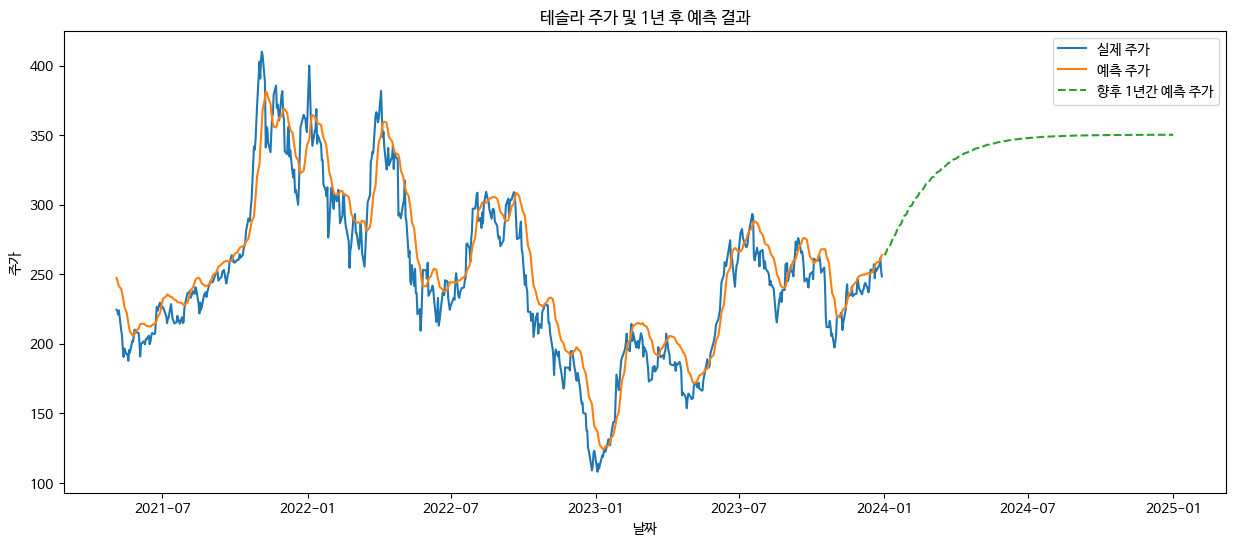

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import FinanceDataReader as fdr

# 테슬라 주식 데이터 가져오기
stock_code = 'TSLA'  # 테슬라 종목코드
start_date = '2010-01-01'
end_date = '2023-12-31'
Tesla_df = fdr.DataReader(stock_code, start_date, end_date)

# 'Close' 열 선택
data = Tesla_df['Close'].values.reshape(-1, 1)

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# 시계열 데이터를 학습용과 테스트용으로 나눔
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train_data, test_data = data_normalized[0:train_size], data_normalized[train_size:len(data_normalized)]

# 시계열 데이터를 학습용 데이터셋으로 변환
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# LSTM에 입력될 형태로 변환
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 모델 예측
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# 향후 1년간 데이터 예측
future_dates = pd.date_range(start='2024-01-01', end='2025-01-01', freq='B')  # 2024-01-01부터 2025-01-01까지의 영업일 날짜 생성
future_data = np.copy(data_normalized[-time_steps:])

predicted_prices = []

for _ in range(len(future_dates)):
    input_data = future_data[-time_steps:]
    input_data = input_data.reshape((1, time_steps, 1))
    predicted_price = model.predict(input_data)[0][0]
    future_data = np.append(future_data, predicted_price)
    predicted_prices.append(predicted_price)

# 역정규화
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# 시각화
plt.figure(figsize=(15, 6))
plt.plot(Tesla_df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='실제 주가')
plt.plot(Tesla_df.index[-len(y_test):], predicted_stock_price, label='예측 주가')
plt.plot(future_dates, predicted_prices, label='향후 1년간 예측 주가', linestyle='dashed')
plt.title('테슬라 주가 및 1년 후 예측 결과')
plt.xlabel('날짜')
plt.ylabel('주가')
plt.legend()
plt.show()


## [2. 파이썬 멀티프로세싱]
### 1. 약 2,000개 종목의 주식 데이터 병합하기

In [ ]:
from tqdm import tqdm
import time
start_time = time.time()

merge_stock_list =[]
for code in tqdm(code_list): # code_list는 1,890개의 종목 코드가 담긴 리스트입니다.
    stock_list = fdr.DataReader(code, '2017').reset_index().values.tolist() # fdr로 불러온 주가 데이터프레임을 리스트로 변형

    for row in stock_list:                   # 불러온 주가 데이터를 1줄씩 불러옴
        row.append(code)                      # 주가 데이터에 기업 코드를 추가
        merge_stock_list.append(row)          # 모든 기업의 데이터를 병합

end_time = time.time()
print('--- 걸린시간: {} ---'.format(end_time - start_time))

 31%|███▏      | 576/1833 [18:42<40:48,  1.95s/it]


KeyboardInterrupt: ignored

해당 라이브러리는 기간 보다는 fdr함수를 1번 호출하는 것에 대해 시간이 많이 들었습니다.\
즉, 한 종목에 대해 2년의 데이터를 불러오는 것과 1년의 데이터를 불러오는 것은 시간 차이가 없음.\
2종목을 각각 1년기간의 데이터를 불러오는게 시간이 오래걸림.\
fdr 함수의 호출 횟수가 시간 복잡도를 많이 잡아 먹습니다.

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

2